* Course: DSC680
* Title: Project 1 MileStone 2
* Author Nels Findley
* 12/21/2025
* Description: Improve Song Recommendation

In [8]:
# Import required libraries
import pandas as pd
import kagglehub
import warnings
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

warnings.filterwarnings("ignore")

In [9]:
# Download latest version
path = kagglehub.dataset_download("ranaghulamnabi/spotify-songs-analytics-dataset")

# Read csv file
df = pd.read_csv(path + "\Popular_Spotify_Songs.csv", encoding='ISO-8859-1')

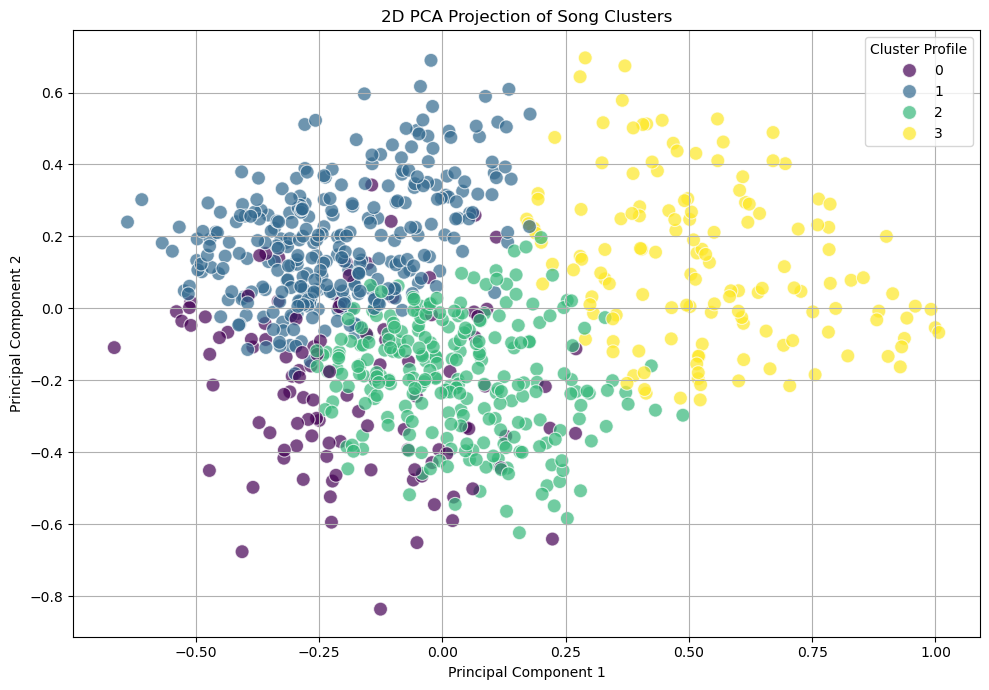

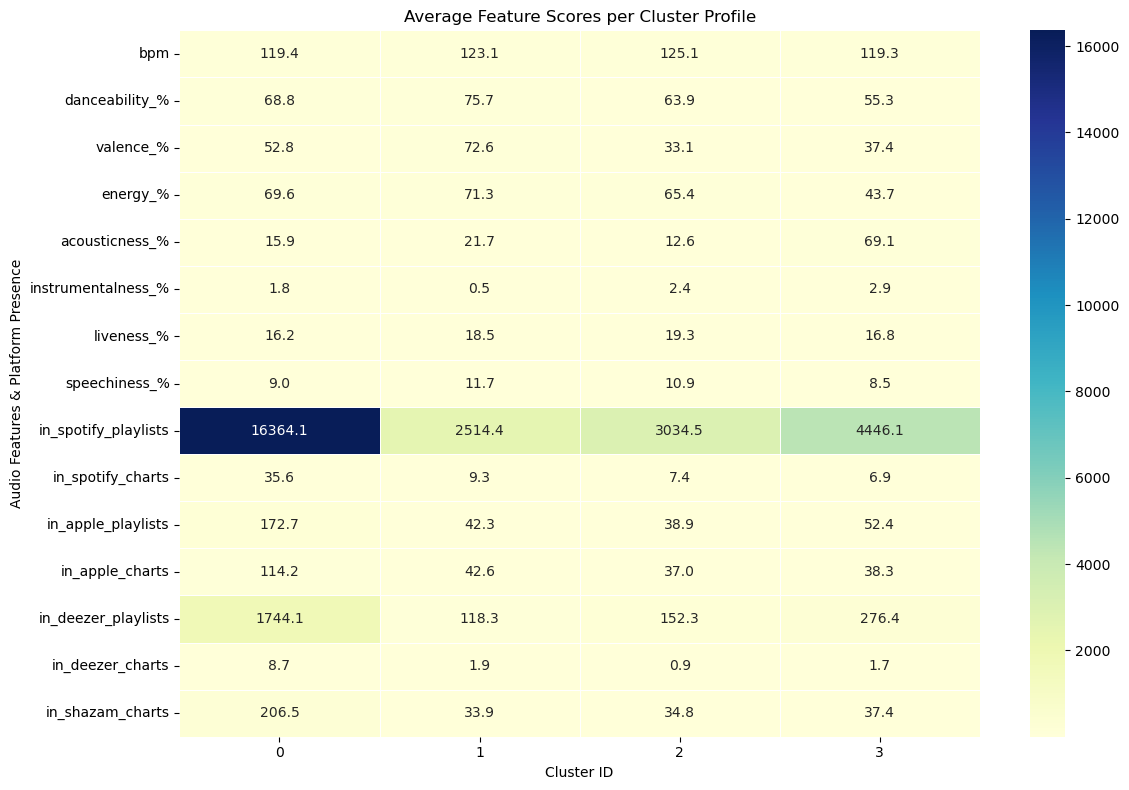

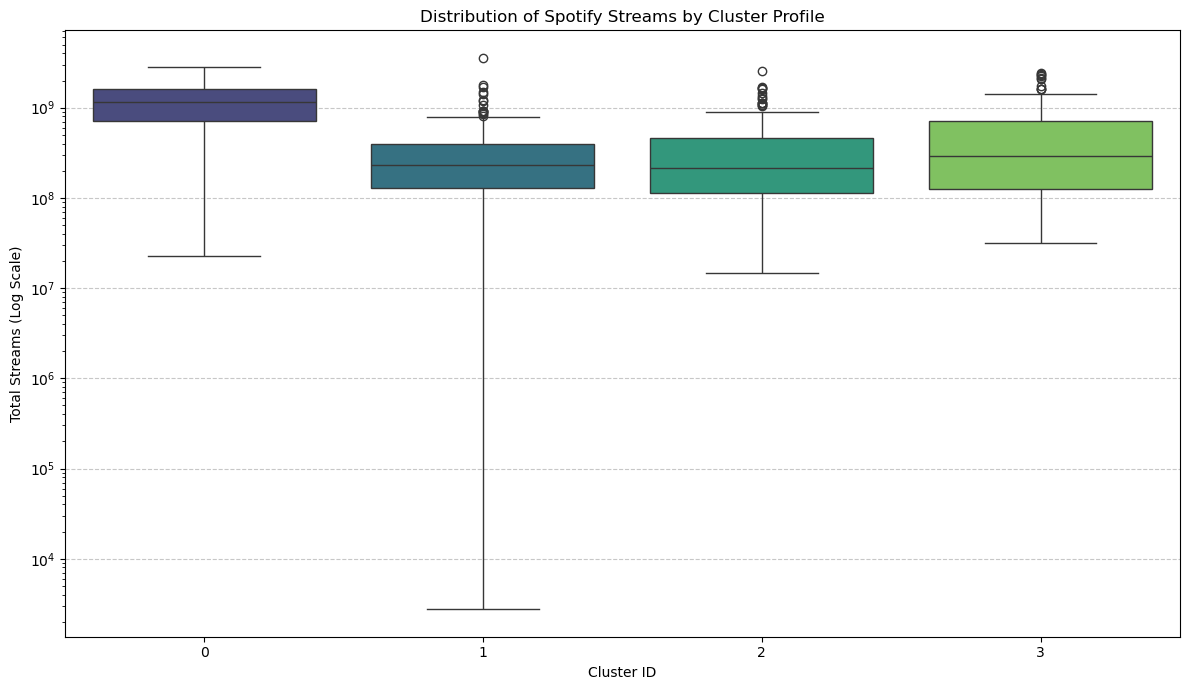

In [10]:
# Clean Data
cols_to_fix = ['streams', 'in_deezer_playlists', 'in_shazam_charts']
for col in cols_to_fix:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

# drop rows with missing values
df = df.dropna()

# select 15 numerical features
features = [
    'bpm', 'danceability_%', 'valence_%', 'energy_%', 
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
    'in_spotify_playlists', 'in_spotify_charts', 
    'in_apple_playlists', 'in_apple_charts', 
    'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts'
]

X = df[features]

# Scales features with [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Use K-Means Clustering modeling
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['cluster_profile'] = kmeans.fit_predict(X_scaled)

# Return the mean features of each cluster
cluster_analysis = df.groupby('cluster_profile')[features].mean()

# Elbow Method Plot
# inertia = []
# K_range = range(1, 11)
# for k in K_range:
#     km = KMeans(n_clusters=k, random_state=42, n_init=10)
#     km.fit(X_scaled)
#     inertia.append(km.inertia_)

# plt.figure(figsize=(10, 6))
# plt.plot(K_range, inertia, marker='o', linestyle='--', color='b')
# plt.xlabel('Number of Clusters (K)')
# plt.ylabel('Inertia (Sum of Squared Distances)')
# plt.title('Elbow Method for Optimal K Selection')
# plt.grid(True)
# plt.tight_layout()
# plt.savefig('elbow_method.png')
# plt.show()
# plt.close()

# 2D PCA Cluster Plot
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='viridis', s=100, alpha=0.7)
plt.title('2D PCA Projection of Song Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster Profile')
plt.grid(True)
plt.tight_layout()
plt.savefig('pca_clusters.png')
plt.show()
plt.close()

# Cluster Profile Heatmap with Mean Characteristics
cluster_means = df.groupby('cluster')[features].mean()
cluster_summary = cluster_means.T

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=.5)
plt.title('Average Feature Scores per Cluster Profile')
plt.ylabel('Audio Features & Platform Presence')
plt.xlabel('Cluster ID')
plt.tight_layout()
plt.savefig('cluster_heatmap.png')
plt.show()
plt.close()

# Box Plot of Streams across Clusters
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='cluster', y='streams', palette='viridis')

plt.yscale('log')
plt.title('Distribution of Spotify Streams by Cluster Profile')
plt.xlabel('Cluster ID')
plt.ylabel('Total Streams (Log Scale)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('streams_distribution.png')
plt.show()
plt.close()